# Superhero (and Supervillain) Name Generator

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

This project aims to create a superhero name generator using TensorFlow. The goal is to train a neural network model on a dataset containing more than 9000 names of superheroes and supervillains from various comic books, TV shows, and movies. The trained model will then be able to generate new superhero names based on the patterns it learns from the dataset.

## How it Works

The project uses a character-level language model, where the neural network predicts the next character in a sequence given a seed input. The seed input can be a single character or a sequence of characters. The model generates a new character, adds it to the seed input, and uses the extended sequence to predict the next character. This process continues iteratively, creating a sequence of characters that eventually forms a superhero name.

# Architecture
In this project, we use a specific architecture for our superhero name generator. The architecture consists of several layers that process the input data and generate the superhero names. Here's a breakdown of the architecture:

1. Embedding Layer (Embedding):

- Input Shape: (None, 32)
- Output Shape: (None, 32, 8)
- Number of Parameters: 232

2. Convolutional 1D Layer (Conv1D):

- Input Shape: (None, 32, 8)
- Output Shape: (None, 32, 64)
- Number of Parameters: 2,624

3. Max Pooling 1D Layer (MaxPooling1D):

- Input Shape: (None, 32, 64)
- Output Shape: (None, 16, 64)

4. LSTM Layer (LSTM):

- Input Shape: (None, 16, 64)
- Output Shape: (None, 32)
- Number of Parameters: 12,416

5. Dense Layer (Dense):

- Input Shape: (None, 32)
- Output Shape: (None, 29)
- Number of Parameters: 957

This architecture takes a sequence of 32 characters as input and uses an embedding layer to convert each character into an 8-dimensional vector representation. The Conv1D layer applies a 1D convolution operation to the embedded sequence, followed by a max pooling operation to reduce the sequence length. The LSTM layer processes the pooled sequence and outputs a 32-dimensional representation. Finally, the Dense layer generates the output, predicting the next character in the sequence from a vocabulary of 29 characters (26 alphabet characters + 3 special characters).

## Data and Tokenizer

1. Import the data
2. Create a tokenizer
3. Char to index and Index to char dictionaries

In [1]:
!git clone https://github.com/am1tyadav/superhero

Cloning into 'superhero'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (8/8), done.


In [2]:
with open('superhero/superheroes.txt', 'r') as f:
  data = f.read()

data[:100]

'jumpa\t\ndoctor fate\t\nstarlight\t\nisildur\t\nlasher\t\nvarvara\t\nthe target\t\naxel\t\nbattra\t\nchangeling\t\npyrrh'

In [3]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [4]:
# tokenizer to convert characters to numbers to give a numeric representation to all character items in the library
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)

In [5]:
tokenizer.fit_on_texts(data)

In [6]:
char_to_index = tokenizer.word_index
index_to_char = dict((v, k) for k, v in char_to_index.items())

print(f"index_to_char: {index_to_char}")
print(f"char_to_index: {char_to_index}")

index_to_char: {1: '\t', 2: 'a', 3: 'e', 4: 'r', 5: 'o', 6: 'n', 7: 'i', 8: ' ', 9: 't', 10: 's', 11: 'l', 12: 'm', 13: 'h', 14: 'd', 15: 'c', 16: 'u', 17: 'g', 18: 'k', 19: 'b', 20: 'p', 21: 'y', 22: 'w', 23: 'f', 24: 'v', 25: 'j', 26: 'z', 27: 'x', 28: 'q'}
char_to_index: {'\t': 1, 'a': 2, 'e': 3, 'r': 4, 'o': 5, 'n': 6, 'i': 7, ' ': 8, 't': 9, 's': 10, 'l': 11, 'm': 12, 'h': 13, 'd': 14, 'c': 15, 'u': 16, 'g': 17, 'k': 18, 'b': 19, 'p': 20, 'y': 21, 'w': 22, 'f': 23, 'v': 24, 'j': 25, 'z': 26, 'x': 27, 'q': 28}


## Names and Sequences

1. Create helper functions to convert between names and sequences

In [7]:
names = data.splitlines()
names[:10]

['jumpa\t',
 'doctor fate\t',
 'starlight\t',
 'isildur\t',
 'lasher\t',
 'varvara\t',
 'the target\t',
 'axel\t',
 'battra\t',
 'changeling\t']

In [8]:
tokenizer.texts_to_sequences(names[0])

[[25], [16], [12], [20], [2], [1]]

In [9]:
def name_to_seq(name):
  return [tokenizer.texts_to_sequences(c)[0][0] for c in name]

In [10]:
name_to_seq(names[0])

[25, 16, 12, 20, 2, 1]

In [11]:
def seq_to_name(seq):
  return ''.join([index_to_char[i] for i in seq if i != 0])

In [12]:
seq_to_name(name_to_seq(names[0]))

'jumpa\t'

## Creating Examples

1. Creating sequences
2. Padding all sequences

In [13]:
sequences = []

for name in names:
  seq = name_to_seq(name)

  # at least 2 characters in name
  if len(seq) >= 2:
    sequences += [seq[:i]for i in range(2, len(seq) + 1)]

In [14]:
sequences[:10]

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1],
 [14, 5],
 [14, 5, 15],
 [14, 5, 15, 9],
 [14, 5, 15, 9, 5],
 [14, 5, 15, 9, 5, 4]]

In [ ]:
# fixed length expected, so pad with 0's

max_len = max([len(x) for x in sequences])

padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences, padding='pre',
    maxlen=max_len
)

print(f"padded sequences example: {padded_sequences[0]}")
print(f"padded sequences shape: {padded_sequences.shape}")

padded sequences example: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 25 16]
padded sequences shape: (88279, 33)


In [25]:
print("Max index in padded_sequences:", padded_sequences.max())
print("Min index in padded_sequences:", padded_sequences.min())

Max index in padded_sequences: 28
Min index in padded_sequences: 0


## Training and Validation Sets

1. Creating training and validation sets

In [16]:
x, y = padded_sequences[:, :-1], padded_sequences[:, -1]

print(x.shape, y.shape)

(88279, 32) (88279,)


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(66209, 32) (66209,)
(22070, 32) (22070,)


In [26]:
num_chars = len(char_to_index.keys())+1

print(num_chars)

29


## Creating the Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, LSTM, Bidirectional, Dense

model = Sequential([
    # because this is a small vocabulary, 8 or 16 should suffice for feature representation
    Embedding(num_chars, 16, input_length=max_len-1),

    # padding: options of calid, causal, or same
    # for causal, temporal order is not violated -- any output at a particular timestep is only dependent on the input before that timestep
    Conv1D(64, 5, strides=1, activation='tanh', padding='causal'),

    MaxPool1D(2),
    LSTM(32),
    Dense(num_chars, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [32]:
h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=80, verbose=2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
    ]
)

Epoch 1/80
2070/2070 - 9s - 4ms/step - accuracy: 0.4498 - loss: 1.8314 - val_accuracy: 0.3759 - val_loss: 2.2099
Epoch 2/80
2070/2070 - 9s - 5ms/step - accuracy: 0.4501 - loss: 1.8284 - val_accuracy: 0.3771 - val_loss: 2.2050
Epoch 3/80
2070/2070 - 9s - 5ms/step - accuracy: 0.4510 - loss: 1.8255 - val_accuracy: 0.3793 - val_loss: 2.2044
Epoch 4/80
2070/2070 - 10s - 5ms/step - accuracy: 0.4536 - loss: 1.8226 - val_accuracy: 0.3762 - val_loss: 2.2122
Epoch 5/80
2070/2070 - 9s - 5ms/step - accuracy: 0.4529 - loss: 1.8195 - val_accuracy: 0.3778 - val_loss: 2.2160
Epoch 6/80
2070/2070 - 9s - 5ms/step - accuracy: 0.4540 - loss: 1.8175 - val_accuracy: 0.3763 - val_loss: 2.2130
Epoch 7/80
2070/2070 - 10s - 5ms/step - accuracy: 0.4563 - loss: 1.8150 - val_accuracy: 0.3792 - val_loss: 2.2135
Epoch 8/80
2070/2070 - 10s - 5ms/step - accuracy: 0.4549 - loss: 1.8121 - val_accuracy: 0.3762 - val_loss: 2.2150
Epoch 9/80
2070/2070 - 10s - 5ms/step - accuracy: 0.4565 - loss: 1.8102 - val_accuracy: 0.379

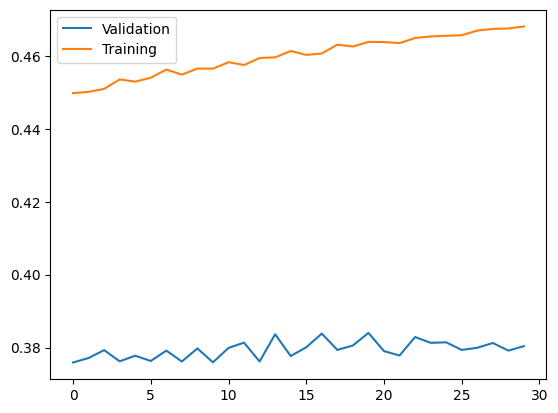

In [33]:
from matplotlib import pyplot as plt

epochs_ran = len(h.history['loss'])

plt.plot(range(0, epochs_ran), h.history['val_accuracy'], label='Validation')
plt.plot(range(0, epochs_ran), h.history['accuracy'], label='Training')
plt.legend()
plt.show()

## Generate Names!

In [34]:
def generate_names(seed):
  # seed could be a single character or sequence of characters
  for i in range(40):
    # only predict until tab character, i.e., end of name
    seq = name_to_seq(seed)
    print(f"seq: {seq}")
    padded = tf.keras.preprocessing.sequence.pad_sequences([seq],
                                                           padding='pre',
                                                           maxlen=max_len-1,
                                                           truncating='pre'
                                                           )
    print(f"padded: {padded}")
    pred = model.predict(padded)[0]
    print(f"pred: {pred}")
    pred_char = index_to_char[tf.argmax(pred).numpy()]

    if pred_char == '\t':
      break
    seed += pred_char
    print(f"Seed: {seed}")

In [36]:
generate_names('b')

seq: [19]
padded: [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0 19]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
pred: [4.8234619e-12 3.4190348e-04 2.3865703e-01 1.4122936e-01 1.0141032e-01
 8.4374502e-02 1.7335910e-03 9.8268047e-02 1.1377372e-04 2.2124573e-06
 1.1951696e-04 2.6606354e-01 1.0767103e-03 6.2932684e-03 9.4555711e-05
 2.7374930e-05 4.4910740e-02 5.0393079e-04 6.7073481e-05 1.7209507e-03
 4.6896671e-06 7.9175476e-03 6.1160536e-04 1.4694439e-03 1.6211061e-03
 1.1538776e-03 1.9890090e-04 1.4473750e-05 5.6503048e-08]
Seed: bl
seq: [19, 11]
padded: [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0 19 11]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
pred: [5.9892819e-15 9.3959774e-05 6.3555455e-01 2.6221490e-02 1.5777645e-03
 1.2811573e-01 2.1468954e-06 6.6366836e-02 7.9543701e-05 3.9437623e-06
 1.0739987e-05 1.3284634e-03 7.4188858e-05 2.4635746e-04 2.5797399e-07
 9.5059495e-06 1.3754781e-01 2.84